In [1]:
library(Seurat)
library(ggplot2)
library(gridExtra)
library(dplyr)
library(SeuratDisk)
library(RColorBrewer)
library(stringr)
library(patchwork)
library('reshape2')
source("/root/workspace/sjh/code/Compare/MIDAS/utils/utils_process.R")

library("IRdisplay")
display_html("<style>.container { width:100% !important; }</style>")


Attaching SeuratObject


Attaching package: 'dplyr'


The following object is masked from 'package:gridExtra':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following object is masked from 'package:gridExtra':

    combine


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, i

In [ ]:
task <- "imc_ref"
experiment = "all_2"
inputdir <- "/root/workspace/sjh/data/paper/result"
sp = "sp_00000999"

In [3]:
c_cols <- c('#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5')
b_cols_2 <- c('#a6cee3','#b2df8a')
b_cols_1 <- c('#DB9D85','#CCA570','#B7AD65','#7EB97A','#5CBD92','#3DBEAB','#3DBCC2','#5FB6D4','#87AEDF','#ACA4E2','#C89BDB','#DA95CC','#E3969E')
b_cols <- c('#9373B7','#394396')
c_cols_2 <- c("#FDDD8D", "#E3CDDA", "#FEF4C9", "#F2B6B4", "#B0CAC7", "#F9D8AA", "#CDD796", "#C4AFD2", "#74ADD1", "#98B994", "#EEEDBC", "#AEC7E8", 
          "#FCA95E", "#D3D8D7", "#9189A5", "#C8DCCC", "#C2ABC0", "#A5B8B3", "#E6B9A2", "#47A49B" , "#99DD8B", "#D966A5", "#2B6919", '#9373B7','#394396')

In [4]:
subset_ids_query <- seq(0, 1)
labels_query = data.frame()
batches_query = data.frame()
labels_dir_query <- pj("/dev/shm/processed/", task, "test", paste0("subset_", subset_ids_query), "labels.csv")

i = 0
for (l in labels_dir_query) {
    df <- read.csv(l)
    labels_query <- rbind(labels_query, df)
    i_ <- gsub("^0$", "D496_BLD",
          gsub("^1$", "B503_BOM", i))
    batches_query <- rbind(batches_query, data.frame(batch = rep(i_, nrow(df))))
    i = i + 1
}

input_dirs_query <-pj(inputdir, task, experiment, "default", "predict", "test", sp, paste0("subset_", subset_ids_query))

In [5]:
#Load model outputs -- query
z_query <- list()
for (i in subset_ids_query + 1) {
    z_dir  <- pj(input_dirs_query[i], "z", "joint")
    fnames <- dir(path = z_dir, pattern = ".csv$")
    fnames <- str_sort(fnames, decreasing = F)
    z_subset <- list()
    for (n in seq_along(fnames)) {
        if (file.exists(file.path(z_dir, fnames[n]))) {
        z_subset[[n]] <- read.csv(file.path(z_dir, fnames[n]), header = F)
        }
    }
    z_query[[i]] <- bind_rows(z_subset)
}
all_z_query <- data.matrix(bind_rows(z_query))


In [6]:
encoder_c_query <- readRDS("/root/workspace/sjh/Download_data/imc/imc_test.rds")
encoder_c_query

An object of class Seurat 
59096 features across 29701 samples within 2 assays 
Active assay: ADT (268 features, 268 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, apca, wnn.umap

In [9]:
#query
query_c <- all_z_query[,1:32]
query_b <- all_z_query[,33:34]
DefaultAssay(encoder_c_query) <- "RNA"

rownames(query_c) <- rownames(encoder_c_query@meta.data)
encoder_c_query[['emb']] <- CreateDimReducObject(embeddings = as.matrix(query_c), key = 'emb')

encoder_c_query <- RunUMAP(object = encoder_c_query, reduction = 'emb', dims = 1:32)

p1 <- DimPlot(encoder_c_query, group.by = "batch", cols = b_cols_2) + 
            theme(panel.border = element_rect(color = "black", linewidth = 1), , axis.title = element_blank(), 
            axis.ticks = element_blank(), axis.text = element_blank()) + ggtitle('') +
            labs(color = "Batch") + theme(legend.position = c(1, 0), legend.justification = c(1.2, -0.2))
p2 <- DimPlot(encoder_c_query, group.by = "celltype", cols = c_cols) + 
            theme(panel.border = element_rect(color = "black", linewidth = 1), , axis.title = element_blank(), 
            axis.ticks = element_blank(), axis.text = element_blank(), plot.margin = margin(0, 0, 20, 0)) + ggtitle('')
p3 <- DimPlot(encoder_c_query, group.by = "cell_type2", cols = c_cols_2) + 
            theme(panel.border = element_rect(color = "black", linewidth = 1), , axis.title = element_blank(), 
            axis.ticks = element_blank(), axis.text = element_blank(), plot.margin = margin(0, 0, 20, 0)) + ggtitle('')


Warning message:
"No assay specified, setting assay as RNA by default."
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from emb to emb_"
Warning message:
"All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to emb_"
Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
09:42:47 UMAP embedding parameters a = 0.9922 b = 1.112

09:42:47 Read 29701 rows and found 32 numeric columns

09:42:47 Using Annoy for neighbor search, n_neighbors = 30

09:42:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*


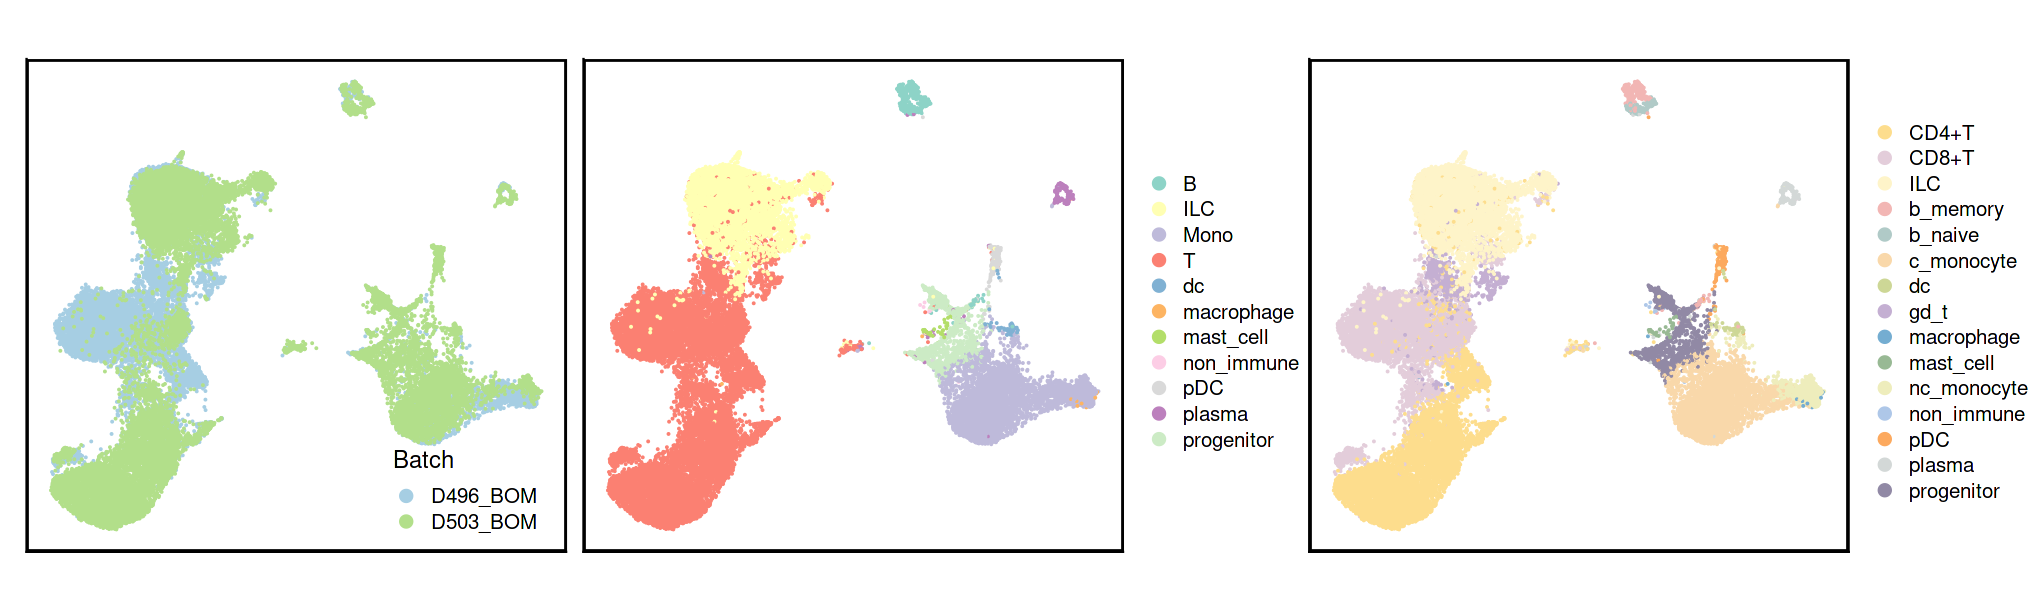

In [10]:
options(repr.plot.width = 17, repr.plot.height = 5)
p1 | p2 | p3

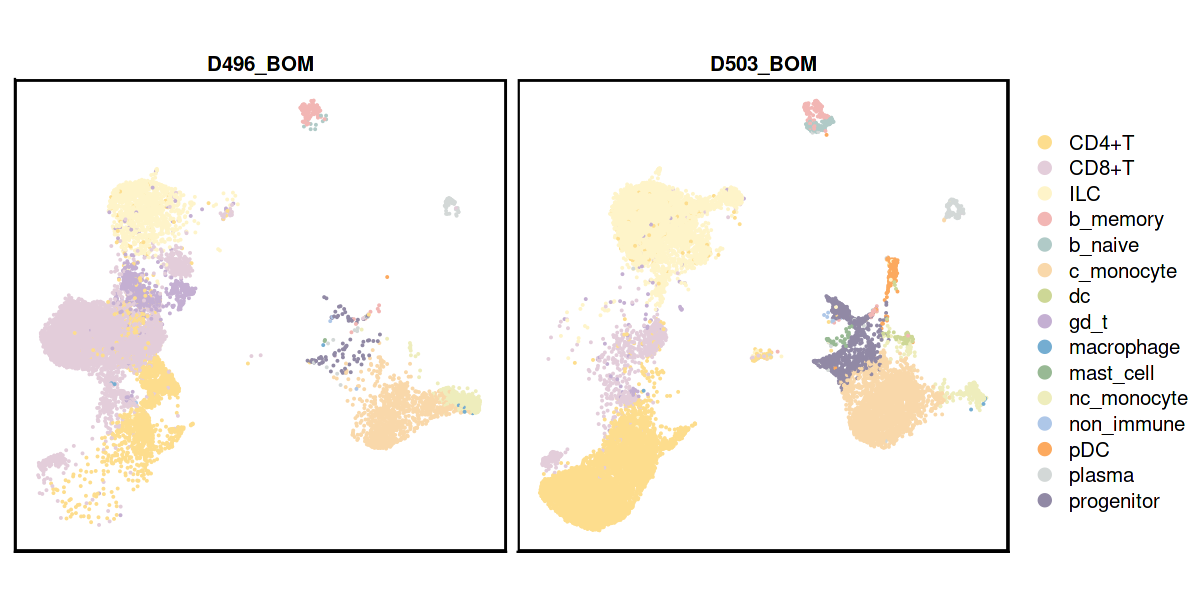

In [11]:
options(repr.plot.width = 10, repr.plot.height = 5)
DimPlot(encoder_c_query, group.by = "cell_type2", cols = c_cols_2, split.by = "batch") + 
            theme(panel.border = element_rect(color = "black", linewidth = 1), , axis.title = element_blank(), 
            axis.ticks = element_blank(), axis.text = element_blank(), plot.margin = margin(0, 0, 20, 0)) + ggtitle('')

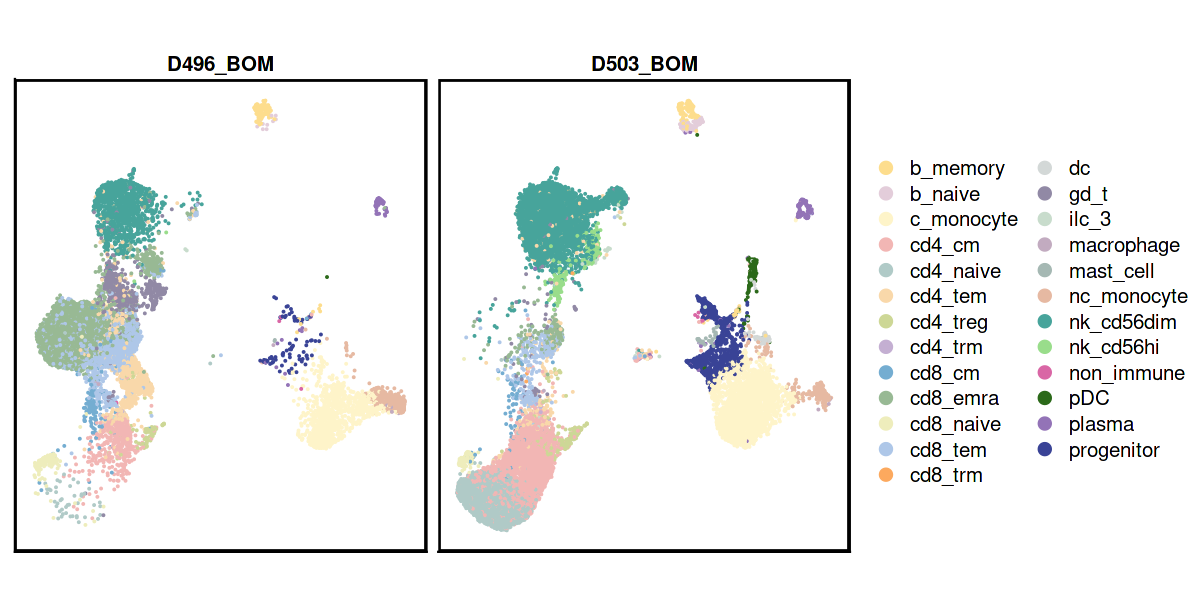

In [39]:
options(repr.plot.width = 10, repr.plot.height = 5)
DimPlot(encoder_c_query, group.by = "cell_type1", cols = c_cols_2, split.by = "batch") + 
            theme(panel.border = element_rect(color = "black", linewidth = 1), axis.title = element_blank(), 
            axis.ticks = element_blank(), axis.text = element_blank(), plot.margin = margin(0, 0, 20, 0)) + ggtitle('')

In [11]:
Idents(encoder_c_query) <- "celltype"
# select <- encoder_c_query[, Idents(encoder_c_query) %in% c("T", "B", "Mono")]
select <- encoder_c_query[, Idents(encoder_c_query) == "T"]
Idents(select) <- "cell_type2"
# select <- select[, Idents(select) != "gd_t"]
DefaultAssay(select) <- "RNA"
select <- NormalizeData(select, normalization.method = "LogNormalize") 
select <- ScaleData(select)

Centering and scaling data matrix



Warning message:
"The sort.cell parameter is being deprecated. Please use the order parameter instead for equivalent functionality."


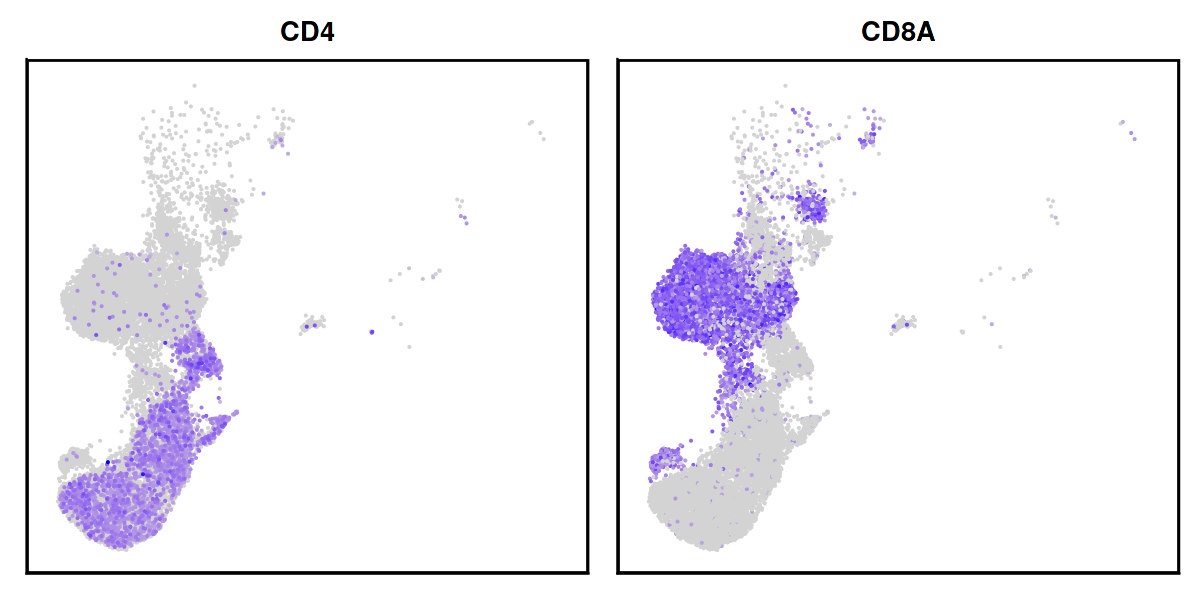

In [14]:
options(repr.plot.width = 10, repr.plot.height = 5)
p1 <- FeaturePlot(select, features = c("CD4"), sort.cell = TRUE) +  
              theme(panel.border = element_rect(color = "black", linewidth = 1), axis.title = element_blank(), 
              axis.ticks = element_blank(), axis.text = element_blank()) +
              theme(legend.position="none", axis.title = element_blank())
p2 <- FeaturePlot(select, features = c("CD8A")) +  
            #   theme(legend.position="none", axis.title = element_blank())
              theme(panel.border = element_rect(color = "black", linewidth = 1), axis.title = element_blank(), 
              axis.ticks = element_blank(), axis.text = element_blank()) +
              theme(legend.position ="none", axis.title = element_blank())
p1 | p2
ggsave("figure4_4.png", p1, dpi = 300, width = 5, height = 5)
ggsave("figure4_5.png", p2, dpi = 300, width = 5, height = 5)

In [87]:
Idents(encoder_c_query) <- "cell_type2"
select@reductions$pca <- NULL
select@reductions$apca <- NULL
select@reductions$wnn.umap <- NULL
# select <- encoder_c_query[, Idents(encoder_c_query) %in% c("T", "B", "Mono")]
select <- encoder_c_query[, Idents(encoder_c_query) == "CD4+T"]
DefaultAssay(select) <- "RNA"
select <- NormalizeData(select, normalization.method = "LogNormalize") 
select <- ScaleData(select)

Centering and scaling data matrix



Warning message:
"Scaling data with a low number of groups may produce misleading results"


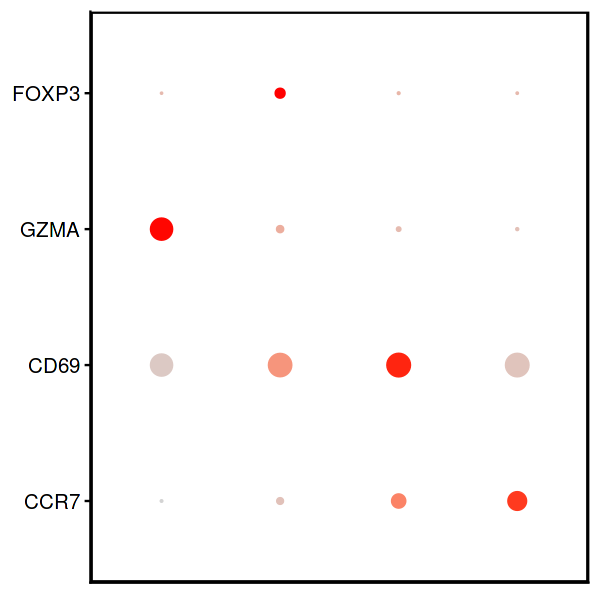

In [90]:
Idents(select) <- "cell_type1"
rna_marker <- c("CCR7", "CD69", "GZMA", "FOXP3")
# levels(select) <- c("cd4_naive", "cd4_m", "cd4_tem", "cd4_terg")
q11 <- DotPlot(select, features = rna_marker, assay = 'RNA', cols = c("lightgrey", "red")) + coord_flip() + 
              theme(axis.title = element_blank(), legend.position = 'none', axis.text.x = element_blank(),
              axis.ticks.x = element_blank()) + 
              guides(colour = guide_colourbar(title.vjust = 0.9, title.hjust = 0)) + 
              theme(panel.border = element_rect(color = "black", fill = NA, size = 1))
q11

Normalizing across features

Centering and scaling data matrix



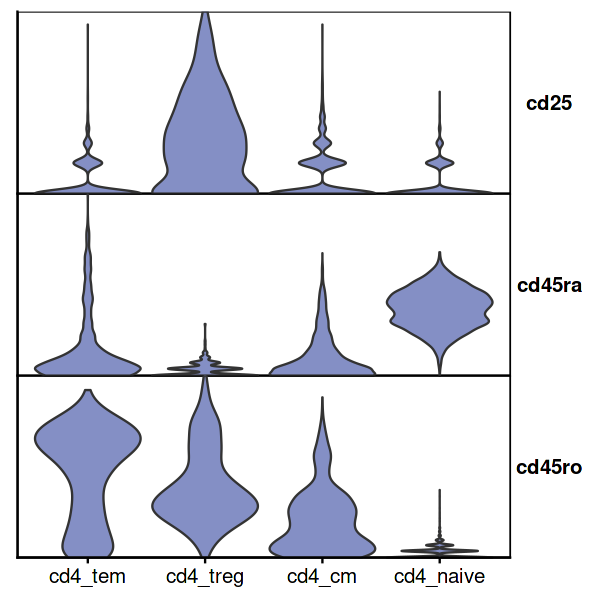

In [46]:
DefaultAssay(select) <- "ADT"
select <- NormalizeData(select, normalization.method = "CLR") 
select <- ScaleData(select)
adt_marker <- c("cd25", "cd45ra", "cd45ro")
q12 <- VlnPlot(select, features = adt_marker, stack = TRUE, flip = TRUE, cols = c("#848FC5", "#848FC5", "#848FC5")) + 
              theme(axis.title = element_blank(), axis.text.y = element_blank(),
              axis.ticks.y = element_blank()) +
       theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
       theme(legend.position = "none")
q12

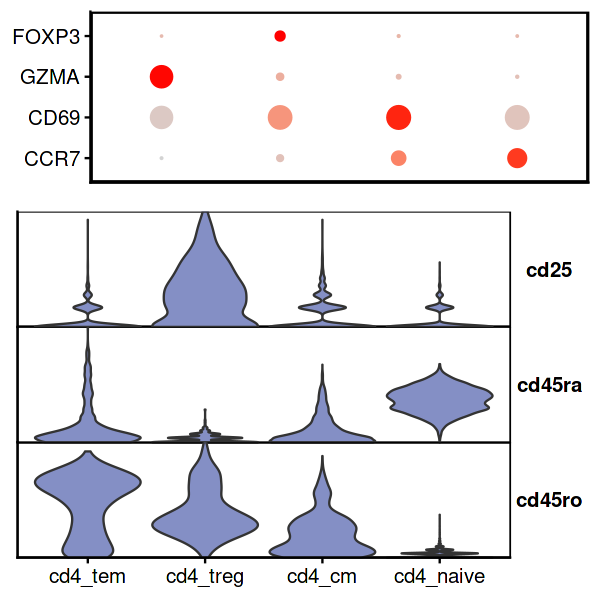

In [47]:
options(repr.plot.width = 5, repr.plot.height = 5)
library(gridExtra)
q1 <- grid.arrange(q11, q12, ncol = 1, heights = c(1, 2))
# ggsave("figure4_6.svg", q1, dpi = 300, width = 5, height = 5)

In [22]:
select@reductions$pca <- NULL
select@reductions$apca <- NULL
select@reductions$wnn.umap <- NULL

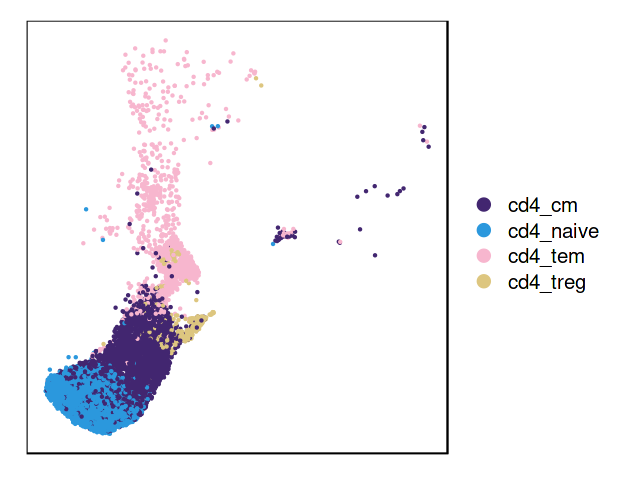

In [73]:
DefaultAssay(select) <- "RNA"
options(repr.plot.width = 5.2, repr.plot.height = 4)
p3 <- DimPlot(select, group.by = "cell_type1", cols = c("#422670", "#2B98DD", "#F7B6CE", "#DDC67F")) + 
            theme(axis.line = element_blank(), axis.title = element_blank(), 
            axis.ticks = element_blank(), axis.text = element_blank()) + 
            theme(panel.border = element_rect(color = "black", linewidth = 0.5), 
            plot.title = element_blank())
p3
ggsave("figure4_7.png", p3, dpi = 300, width = 5.2, height = 4)

In [109]:
saveRDS(select, "CD4+T.rds")

In [83]:
Idents(encoder_c_query) <- "cell_type2"
# select <- encoder_c_query[, Idents(encoder_c_query) %in% c("T", "B", "Mono")]
select2 <- encoder_c_query[, Idents(encoder_c_query) == "CD8+T"]
DefaultAssay(select2) <- "RNA"
select2 <- NormalizeData(select2, normalization.method = "LogNormalize") 
select2 <- ScaleData(select2)

Centering and scaling data matrix



In [108]:
saveRDS(select2, "CD8+T.rds")

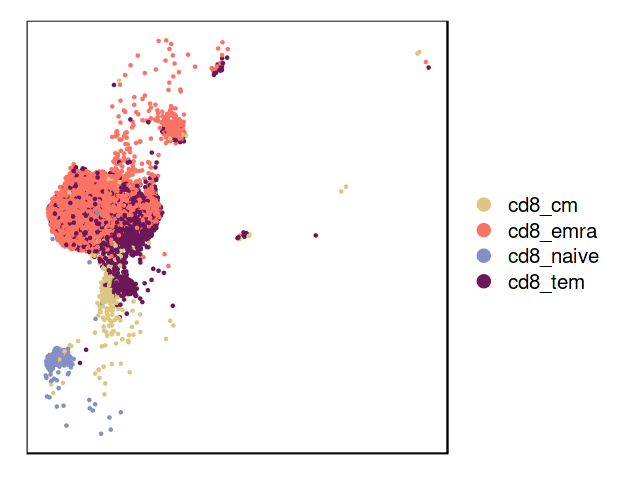

In [115]:
options(repr.plot.width = 5.2, repr.plot.height = 4)
DefaultAssay(select2) <- "RNA"
p4 <- DimPlot(select2, group.by = "cell_type1", cols = c("#DDC67F", "#FB7365", "#848FC5", "#6C1757")) + 
            theme(axis.line = element_blank(), axis.title = element_blank(), 
            axis.ticks = element_blank(), axis.text = element_blank()) + 
            theme(panel.border = element_rect(color = "black", linewidth = 0.5), 
            plot.title = element_blank())
p4
# ggsave("figure4_8.png", p4, dpi = 300, width = 5.2, height = 4)

Warning message:
"Scaling data with a low number of groups may produce misleading results"


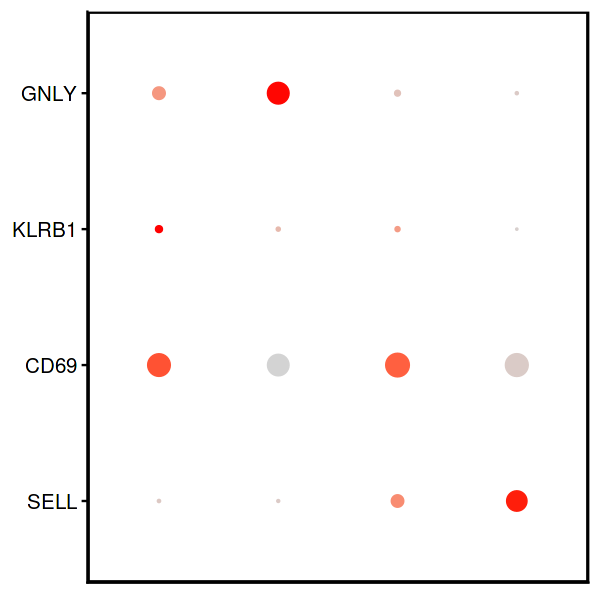

In [111]:
Idents(select2) <- "cell_type1"
rna_marker <- c("SELL", "CD69", "KLRB1", "GNLY")
# levels(select) <- c("cd4_naive", "cd4_m", "cd4_tem", "cd4_terg")
q11 <- DotPlot(select2, features = rna_marker, assay = 'RNA', cols = c("lightgrey", "red")) + coord_flip() + 
              theme(axis.title = element_blank(), legend.position = 'none', axis.text.x = element_blank(),
              axis.ticks.x = element_blank()) + 
              guides(colour = guide_colourbar(title.vjust = 0.9, title.hjust = 0)) + 
              theme(panel.border = element_rect(color = "black", fill = NA, size = 1))
q11

Normalizing across features

Centering and scaling data matrix



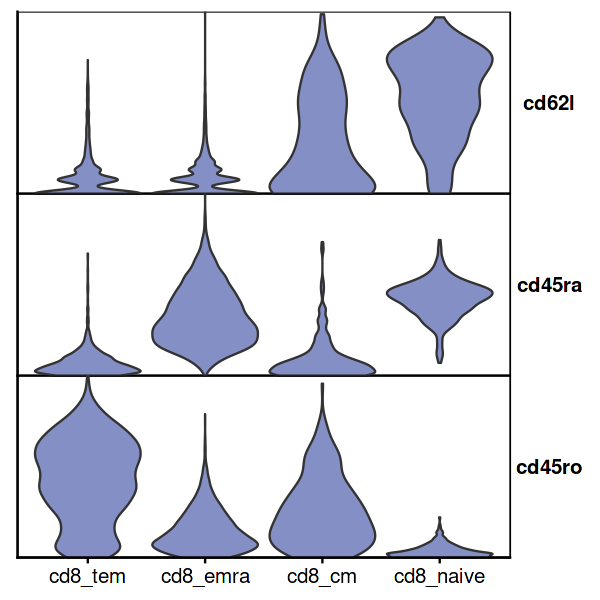

In [112]:
DefaultAssay(select2) <- "ADT"
select2 <- NormalizeData(select2, normalization.method = "CLR") 
select2 <- ScaleData(select2)
adt_marker <- c("cd62l", "cd45ra", "cd45ro")
q12 <- VlnPlot(select2, features = adt_marker, stack = TRUE, flip = TRUE, cols = c("#848FC5", "#848FC5", "#848FC5")) + 
              theme(axis.title = element_blank(), axis.text.y = element_blank(),
              axis.ticks.y = element_blank()) +
       theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
       theme(legend.position = "none")
q12

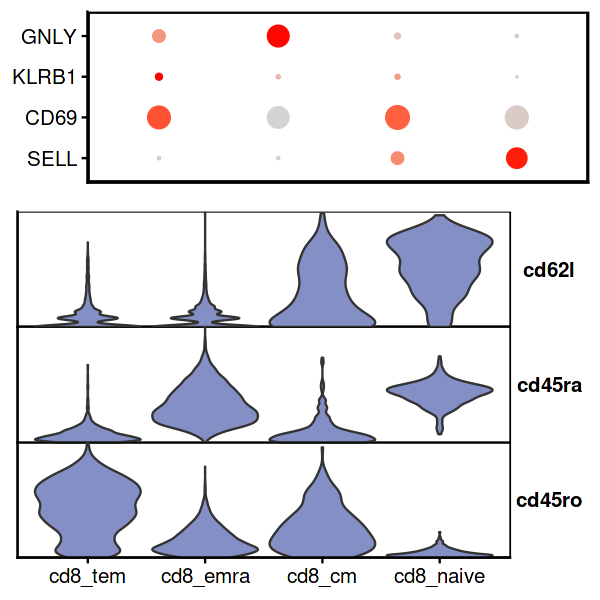

In [113]:
options(repr.plot.width = 5, repr.plot.height = 5)
library(gridExtra)
q1 <- grid.arrange(q11, q12, ncol = 1, heights = c(1, 2))
ggsave("figure4_9.svg", q1, dpi = 300, width = 5, height = 5)